# Different Feature Representations of MNIST digits

**Exercises** (in bold) involve running the code provided, examining the outputs, and answering the questions on the handout, which you will submit after you're done. These count towards your reading responses+in-class exercise grade. 

In [7]:
# setup:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def load(filename):
    Xy = np.loadtxt(filename, delimiter=',')
    y = Xy[:, -1]
    X = Xy[:, :-1]
    return X, y

from sklearn.neighbors import KNeighborsClassifier
def knn_predscore(trainX, trainy, testX, testy, k, metric='euclidean'):
    model = KNeighborsClassifier(n_neighbors=k,
                                metric=metric)

    model.fit(trainX, trainy)
    return model.score(testX, testy)

from sklearn.linear_model import Perceptron
def perceptron_predscore(trainX, trainy, testX, testy):
    model = Perceptron(n_iter=200)
    model.fit(trainX, trainy)
    return model.score(testX, testy)

Load the MNIST images as 784-dimensional vectors (each dim a pixel) as in PS1. Keep only 2 digits for binary classification.

In [8]:
trainXraw, trainyraw = load('training.txt')
testXraw, testyraw = load('testing.txt')

In [9]:
def load_2digits(c1, c2, trainXraw, trainyraw, testXraw, testyraw):
    """filter the full MNIST dataset to two digits for binary classification"""
    trainX = trainXraw[(trainyraw == c1) | (trainyraw == c2), :]
    trainy = trainyraw[(trainyraw == c1) | (trainyraw == c2)]

    testX = testXraw[(testyraw == c1) | (testyraw == c2), :]
    testy = testyraw[(testyraw == c1) | (testyraw == c2)]

    labelmap = {c1: -1, c2: +1}  # arbitrary assignment of +1 and -1 to the two classes
    for label in labelmap:
        trainy[trainy == label] = labelmap[label]   
        testy[testy == label] = labelmap[label]      

    print 'Loaded', trainy.size, 'training points and', testy.size, 'testing points for digits', c1, 'and', c2
    return trainX, trainy, testX, testy, labelmap

Let's consider the digits 

In [16]:
trainX, trainy, testX, testy, labelmap = load_2digits(1, 9, trainXraw, trainyraw, testXraw, testyraw)

Loaded 2000 training points and 200 testing points for digits 1 and 9


In [17]:
print 'kNN accuracy on original feature rep is', knn_predscore(trainX, trainy, testX, testy, 3)
print 'Perceptron accuracy on original feature rep is', perceptron_predscore(trainX, trainy, testX, testy)

kNN accuracy on original feature rep is 0.995
Perceptron accuracy on original feature rep is 0.995


### Tangent: Visualizing the mean images and w.

Let's visualize the "average" image in our dataset.

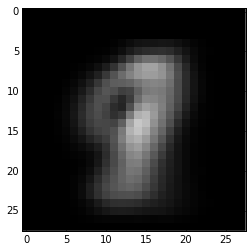

In [18]:
meanimg = np.mean(trainX, axis=0)  # get mean of each feature
# visualize mean image for fun
plt.imshow(meanimg.reshape(28, 28), interpolation='none', cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)

The following two cells visualize the average of *each* digit separately.

Visualizing 1 ( -1 )


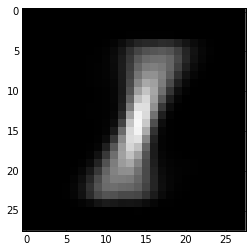

In [19]:
c1 = labelmap.keys()[0]
print 'Visualizing', c1, '(', labelmap[c1], ')'
meanc1 = np.mean(trainX[trainy==labelmap[c1], :], axis=0)
plt.imshow(meanc1.reshape(28, 28), interpolation='none', cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)

Visualizing 9 ( 1 )


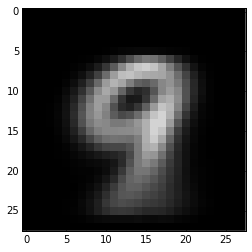

In [20]:
c2 = labelmap.keys()[1]
print 'Visualizing', c2, '(', labelmap[c2], ')'
meanc2 = np.mean(trainX[trainy==labelmap[c2], :], axis=0)
plt.imshow(meanc2.reshape(28, 28), interpolation='none', cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)

The weight vector learned by the perceptron to distinguish 1 (-1 label) and 9 (+1 label) is itself a 784-dim vector, since the data lives in 784 dimensions. Just for fun, let us visualize it as an image!

**Exercise a**: According to the colorbar legend, green represents 0. Why is the weight vector green around the boundaries?

<matplotlib.colorbar.Colorbar instance at 0x11ca0c5a8>

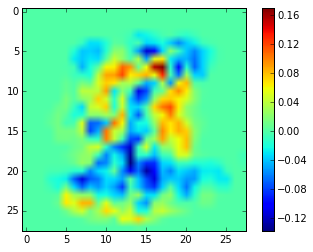

In [21]:
from numpy.linalg import norm

model = Perceptron(n_iter=200, fit_intercept=False)   # no bias fitting
model.fit(trainX, trainy)
w = model.coef_[0]
w/=norm(w, 2)  # normalize

plt.imshow(w.reshape(28, 28), cmap = plt.get_cmap('jet'), 
           vmin = np.min(w), vmax = np.max(w))
plt.colorbar()

## Experiment 1: Center and Variance-Scale the Features

### 1a

Compute the mean for each feature in the vector space.
Center the points by subtracting the mean.

$$f_{i, j}-\mu_j$$

Let's see what happens for a toy example in 2-d space.

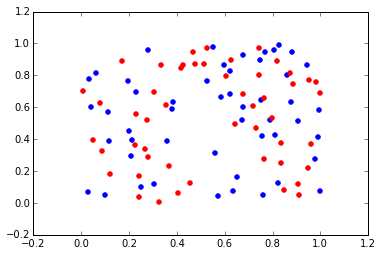

In [30]:
def scatterplot_labeledpoints(X, y):
    """plot 2-d points, colored with one of two labels (-1 or 1)"""
    plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
    plt.scatter(X[y==-1, 0], X[y==-1, 1], color='r')
    plt.show()
    
# original points
toyX = np.random.rand(100, 2)   # 100 points in 2d
toyy = np.ones(100)
toyy[50:] = -1
scatterplot_labeledpoints(toyX, toyy)

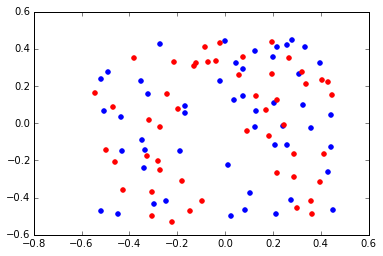

In [31]:
# after centering
meantoy = np.mean(toyX, axis=0)
centeredToyX = toyX - meantoy
scatterplot_labeledpoints(centeredToyX, toyy)

**Exercise b:** from the plots, how did the toy data change after centering?

Now let's see how centering affects classification accuracy on the MNIST digits. Remember that we're working with a binary dataset of two digits, so we can apply the perceptron.

In [28]:
centeredTrainX = trainX-meanimg
centeredTestX = testX-meanimg # can't use means of test data; use training means
    
print 'kNN accuracy on centered feature rep is', knn_predscore(centeredTrainX, trainy, centeredTestX, testy, 3)
print 'Perceptron accuracy on centered feature rep is', perceptron_predscore(centeredTrainX, trainy, centeredTestX, testy)

kNN accuracy on centered feature rep is 0.995
Perceptron accuracy on centered feature rep is 0.99


**Exercise c:** Was there a change in kNN or perceptron accuracy compared to the original dataset? If there was no change, explain why. 

### 1b

Compute the standard deviation for each of the features and normalize each vector.

$$\dfrac{f_{i, j}}{\sigma_j}$$

In [ ]:
stds = np.std(trainX, axis=0)  # get variance on each column (feature)
stds[stds==0] = 1  # to prevent zero division errors
stdnormTrainX = trainX/stds
stdnormTestX = testX/stds # can't use variances of test data; use training variances

print 'kNN accuracy on normalized feature rep is', knn_predscore(stdnormTrainX, trainy, stdnormTestX, testy, 3)
print 'Perceptron accuracy on normalized feature rep is', perceptron_predscore(stdnormTrainX, trainy, stdnormTestX, testy)

censtdnormTrainX = centeredTrainX/stds
censtdnormTestX = centeredTestX/stds
print 'kNN accuracy on centered+normalized feature rep is', knn_predscore(censtdnormTrainX, trainy, censtdnormTestX, testy, 3)
print 'Perceptron accuracy on centered+normalized feature rep is', perceptron_predscore(censtdnormTrainX, trainy, censtdnormTestX, testy)

## Experiment 2: Example-Norm the Data-Points

Scale every data-point (row) by its Euclidean norm.

$$\dfrac{x}{||x||}$$

In [ ]:
trainnorms = norm(trainX, axis=1, keepdims=True)
exnormTrainX = trainX/trainnorms
testnorms = norm(testX, axis=1, keepdims=True)
exnormTestX = testX/testnorms
print 'kNN accuracy on example-normed feature rep is', knn_predscore(exnormTrainX, trainy, exnormTestX, testy, 3)
print 'Perceptron accuracy on example-normed feature rep is', perceptron_predscore(exnormTrainX, trainy, exnormTestX, testy)

## Experiment 3: Simpler Feature Design

### Binarize the Feature Values

Make every feature value 0 or 1 by thresholding (remove grays).

In [ ]:
binTrainX = np.zeros(trainX.shape)
binTrainX[trainX>50] = 1
binTestX = np.zeros(testX.shape)
binTestX[testX>50] = 1

In [ ]:
print 'kNN accuracy on binarized feature rep is', knn_predscore(binTrainX, trainy, binTestX, testy, 3)
print 'Perceptron accuracy on binarized feature rep is', perceptron_predscore(binTrainX, trainy, binTestX, testy)

### Region-Based Feature Representations

Here's one simple way of featurizing the image with a small number of dimensions.

Re-represent the data points as n-dimensional vectors consisting of the number of black pixels in n regions of the image.

Does this give us enough information for classification?

In [ ]:
def numblack(X, regions):
    Xregions = []
    dims = X.shape[1]
    for i in range(regions):
        if i==0:
            tmp = X[:, :dims/regions]
        else:
            tmp = X[:, dims*(i-1)/regions:dims*i/regions]
        Xregions.append(np.sum(tmp==0, axis=1))
    return np.vstack(tuple(Xregions)).T
    
blackTestX = numblack(testX, 28)
blackTrainX = numblack(trainX, 28)

In [ ]:
print 'kNN accuracy on 1-dim feature rep is', sklearn_knn_predictscore(blackTrainX, trainy, blackTestX, testy, 3, 'euclidean')
print 'Perceptron accuracy on 1-dim feature rep is', perceptron_predscore(blackTrainX, trainy, blackTestX, testy)